In [12]:
import initial
import cnn_rnn_model
import plot_pr
import tester
from os import sys, path 
from relation_extraction import RelationExtraction

#Make sure this file has access/visibility to base file by appending to path as done in main.py and such.
#For demo purposes before pushing to repo, this is in the /src folder. But it will be in the /demo folder.
AtNRE_dir = path.dirname(path.dirname(path.abspath('main.py')))

In [4]:
class AtNRE(RelationExtraction):

    def __init__(self):
        pass

    def read_dataset(self, input_file):
        k = initial.init_entityebd(input_file)
        return k

    def data_preprocess(self):
        k = initial.seperate()
        initial.init_cnndata()
        return k

    def tokenize(self, input_data=None ,ngram_size=None):
        pass

    def load_embedding(self, vec_dir):
        k = initial.init_batchdata(vec_dir)
        return k 

In [8]:
class AtNRE(AtNRE):
    def build_model():
        pass
    def train(self, train_data=None):
        print('train model')
        cnn_rnn_model.train(AtNRE_dir +'/cnndata/cnn_train_word.npy', AtNRE_dir +'/cnndata/cnn_train_pos1.npy', AtNRE_dir + '/cnndata/cnn_train_pos2.npy',AtNRE_dir +'/cnndata/cnn_train_y.npy',AtNRE_dir +'/model/best_cnn_model.ckpt')
        pass

    def predict(self, test_data=None, entity_1=None, entity_2=None,  trained_model = None):
        num_total = tester.produce_label_data()
        tester.produce_pred_data(save_path=AtNRE_dir+ '/model/best_cnn_model.ckpt',output_path = AtNRE_dir +'/result/best_pred_entitypair.pkl')
        result = tester.P_N(label_path = AtNRE_dir +'/data/label_entitypair.pkl',pred_path = AtNRE_dir+'/result/best_pred_entitypair.pkl')
        print ('best_cnn_P@100,200,300:',result)
        List_Precision = []
        List_Recall = []
        Precision, Recall = tester.PR_curve(label_path =AtNRE_dir + '/data/label_entitypair.pkl',pred_path = AtNRE_dir +'/result/best_pred_entitypair.pkl',
                             num_total=num_total)
        List_Precision.append(Precision)
        List_Recall.append(Recall)
        tester.save_pr(List_Precision, List_Recall)
        return List_Precision, List_Recall
    def evaluate(self, input_data=None, trained_model = None):
        plot_pr.plot()
        pass

In [9]:
obj = AtNRE()

In [13]:
directory = AtNRE_dir + '/origin_data/train.txt'
vec_dir = AtNRE_dir + '/origin_data/vec.txt'

In [14]:
directory

'/Users/aravindjyothi/548 Projects/relation/AtNRE/origin_data/train.txt'

In [15]:
vec_dir

'/Users/aravindjyothi/548 Projects/relation/AtNRE/origin_data/vec.txt'

In [17]:
#obj.read_dataset(directory)

In [18]:
#obj.load_embedding(vec_dir)

In [19]:
#obj.data_preprocess()

In [16]:
obj.train()

train model
reading wordembedding
reading training data


epoch 3 loss=0.306334 accuracy=0.913333: 100%|██████████| 1742/1742 [09:20<00:00,  3.43it/s]


In [20]:
obj.predict()

num_entitypair： 96678
num_entitypair_true: 1761
INFO:tensorflow:Restoring parameters from /Users/aravindjyothi/548 Projects/relation/AtNRE/model/best_cnn_model.ckpt


100%|██████████| 1725/1725 [00:33<00:00, 51.39it/s]


best_cnn_P@100,200,300: [0.27, 0.305, 0.3]


([[0.4,
   0.3,
   0.3,
   0.3,
   0.34,
   0.3,
   0.3,
   0.275,
   0.2777777777777778,
   0.27,
   0.2636363636363636,
   0.2833333333333333,
   0.3,
   0.29285714285714287,
   0.2866666666666667,
   0.2875,
   0.28823529411764703,
   0.3055555555555556,
   0.3,
   0.305,
   0.3,
   0.29545454545454547,
   0.30869565217391304,
   0.30833333333333335,
   0.304,
   0.3076923076923077,
   0.3111111111111111,
   0.30357142857142855,
   0.296551724137931,
   0.3,
   0.3064516129032258,
   0.30625,
   0.30303030303030304,
   0.3058823529411765,
   0.30857142857142855,
   0.30833333333333335,
   0.3027027027027027,
   0.30526315789473685,
   0.30512820512820515,
   0.305,
   0.3121951219512195,
   0.31666666666666665,
   0.32325581395348835,
   0.325,
   0.3288888888888889,
   0.33043478260869563,
   0.32553191489361705,
   0.32708333333333334,
   0.32448979591836735,
   0.328,
   0.33137254901960783,
   0.33076923076923076,
   0.330188679245283,
   0.32407407407407407,
   0.32181818181818

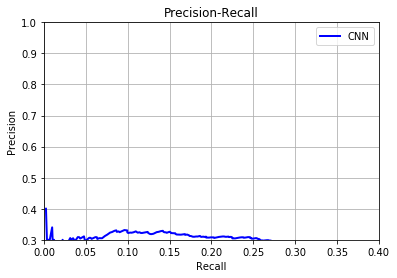

In [21]:
obj.evaluate()